In [6]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os #ignore for now

loading a file from a sub directory needs the filesystem separator. the package os.sep provides this platform independent (on linux and windows alike)

In [ ]:
filen='data\\sinc.dat'
import os
filen=[]# always use a data storage before to many parameter. It is easier to keep track and one can potentially iterate
filen.append(os.sep.join(('data','sinc.dat')))
filen.append(os.sep.join(('data','sinc_2.dat')))
filen.append(os.sep.join(('data','APS_Copper_SolarCell.dat')))

Now we are loading the two files

In [ ]:
df=pd.read_csv(filen[0],sep=',',index_col=0)
df2=pd.read_csv(filen[1],sep='\t',index_col=0)
#df.plot();df2.plot();

In [ ]:
col_names='N  Epoch  Energy  k  Mono  Seconds  ion1  ion2  ion3  ion4  mud  mud1  mostabc  SYNM  PR  bun-1  bun-1GS  bun1  bun1GS  bun2  bun2GS  DifSYN  Difb_1  Difb1  Difb2  c0o0b0  c0o1b0  c0o2b0  c0o3b0  c0o4b0  c0o5b0  c0o6b0  c0o7b0  c0o8b0  c0o9b0  c0o10b0  c0o11b0  c0o12b0  c0o13b0  c0o14b0  c0o15b0  c0o16b0  c0o17b0  c0o18b0  c0o19b0  c0o20b0  c0o21b0  c1o0b0  c1o1b0  c1o2b0  c1o3b0  c1o4b0  c1o5b0  c1o6b0  c1o7b0  c1o8b0  c1o9b0  c1o10b0  c1o11b0  c1o12b0  c1o13b0  c1o14b0  c1o15b0  c1o16b0  c1o17b0  c1o18b0  c1o19b0  c1o20b0  c1o21b0  c2o0b0  c2o1b0  c2o2b0  c2o3b0  c2o4b0  c2o5b0  c2o6b0  c2o7b0  c2o8b0  c2o9b0  c2o10b0  c2o11b0  c2o12b0  c2o13b0  c2o14b0  c2o15b0  c2o16b0  c2o17b0  c2o18b0  c2o19b0  c2o20b0  c2o21b0  c3o0b0  c3o1b0  c3o2b0  c3o3b0  c3o4b0  c3o5b0  c3o6b0  c3o7b0  c3o8b0  c3o9b0  c3o10b0  c3o11b0  c3o12b0  c3o13b0  c3o14b0  c3o15b0  c3o16b0  c3o17b0  c3o18b0  c3o19b0  c3o20b0  c3o21b0'
col_names=col_names.split()
df3=pd.read_csv(filen[2],skiprows=30,names=col_names,sep='\s+',index_col=2)
df3.head()

In [ ]:
df3['PR'].plot()
df3=pd.read_csv(filen[2],skiprows=30,sep='\s+',names=['Energy','PR'],index_col=0,usecols=[2,14])
df3=pd.read_csv(filen[2],skiprows=29,escapechar='L',sep='\s+',index_col=0,usecols=[2,14])
#df3.plot()

# Pandas slicing
Pandas is a powerfull library for data Processing. Beside its strong import function it has a bunch of statistical modules and most important special, value based indexing, sorting and filtering and plotting.

A whole bunch of tutorials for Pandas are available online:<br>
https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html<br>
or<br>
https://dataanalysispython.readthedocs.io/en/latest/index.html<br>

While challenging at first it is worth digging into the structure as it is very convenient for handling data and the quasi standard. <br>

imports come from csv or excel sheets or the internet. powerful filtering techniques can be applied to get rid of missing data or outliers. We use for now the indexing methods we learned for numpy but now using pandas indexing:

### pandas indexing, 2 types:

df.loc["name of row","name of column"] "name based indexing"<br>
df.iloc[1:5,3:5] "index based indexing (pretty much like numpy)"<br>
df.index #extract the index as a vector

### pandas creating: over dictionaries

rate [mol/s],1,2,3,4,5,6,7,8,9
time [s],,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.1,0.904837,0.951229,0.967216,0.975310,0.980199,0.983471,0.985816,0.987578,0.988950
0.2,0.818731,0.904837,0.935507,0.951229,0.960789,0.967216,0.971833,0.975310,0.978023
0.3,0.740818,0.860708,0.904837,0.927743,0.941765,0.951229,0.958048,0.963194,0.967216
0.4,0.670320,0.818731,0.875173,0.904837,0.923116,0.935507,0.944459,0.951229,0.956529


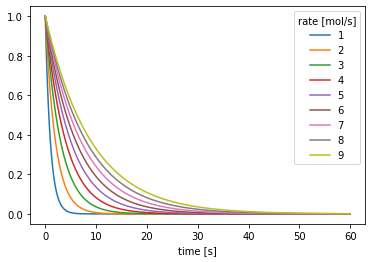

In [20]:
timen=np.arange(0,60,0.1)
dicten={}
for rate in np.arange(1,10,1):
    dicten['%i'%rate]=np.exp(-timen/rate)

df=pd.DataFrame(dicten,index=timen)
df.index.name='time [s]'
df.columns.name='rate [mol/s]'
df.plot()
df.head()

To select only the times between 10s and 20s one can then simply choose:

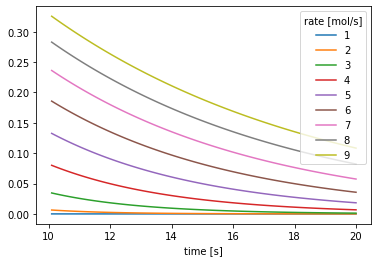

In [25]:
df.loc[10.01:20.04,:].plot() #I choose here a uneven cut to show that we do not have to hit an actually excisting value.

one can understand the DataFrame as a fancy dictionary and add e.g. new columns by 

In [26]:
df[10]=np.exp(-timen/rate)

Task: Create the a DataFrame with position from -5 cm to 5 cm as the index and in the columns different gaussians bell curves <br>
${\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\operatorname {exp} \left(-{\frac {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}\right)$<br>
with the same central position (mu=0) and different width sigma (0.5,1,2,3,4)
using the simplified plotting from above to show them in the same plot

# Plotting

What does plotting actually mean? <br>
import matplotlib.pyplot as plt <br>
[Matplotlib backends](https://matplotlib.org/tutorials/introductory/usage.html#backends)

In [ ]:
%matplotlib inline
#standard plotting
plt.plot(np.arange(-5,5,0.01),np.sin(2*np.pi*np.arange(-5,5,0.01)))
plt.xlim((-4,4)) # the order matters!

In [ ]:
%matplotlib notebook  
#interactives and powerfull backend
plt.ion()  #interactives plotting
plt.plot(np.arange(-5,5,0.01),np.sin(2*np.pi*np.arange(-5,5,0.01)))
plt.xlim((-4,4)) # the order matters!

In [1]:
%matplotlib qt 
#interactives and externes plotting. using the qt platform, most powerfull if qt is installed
plt.plot(np.arange(-5,5,0.01),np.sin(2*np.pi*np.arange(-5,5,0.01)))
plt.xlim((-4,4)) # the order matters!

UsageError: unrecognized arguments: #interactives and externes plotting. using the qt platform, most powerfull if qt is installed


So a plot has a Frame = Figure = The window 
and what is plotted on it = the axis.

What does a plot consist of?
<div>
<img src="http://www.jensuhlig.de/Kemm30/KEMM30_006.png" width="600">
</div>

### Matlab style plotting $\leftrightarrow $ Object style plotting, why make it more complicate?
our convention: we use matlab type plotting for quick convenience and the object type for everything else

The get handle afterwards method:

In [ ]:
fig=plt.gcf() #get current figure
ax=plt.gca() #get current axis
ax=fig.get_axes() #get all axes

the get handle before method

In [ ]:
fig=plt.figure()  #want to use options?
ax=fig.add_axes() #want to use options

lazy combine both

In [ ]:
fig,ax=plt.subplots() #single axis
fig,(ax1,ax2)=plt.subplots(1,2) #
fig,ax=plt.subplots(2,1) # multiple axis as a list

In [ ]:
fig,ax=plt.subplots()
x=np.arange(0,4,0.01)
ax.plot(x,np.sin(2*np.pi*x))
ax.set_xlim(-2,4)
plt.show()#

### Ticks

In [ ]:
#set ticks manual
ax.set_xticks(np.arange(0,4,0.5))

#set ticks manual
a=ax.get_xticks()
ax.set_xticklabels(['%.2f'%b for b in a])

#set axis label
_=ax.set_xlabel('schniffdiff')

#legend
leg=ax.legend(frameon=False,loc=4)

### cheat sheets

How should I ever remember all of this? $\rightarrow$ you get used to it or you look it up/use a cheat sheet <br>
https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png      <br>
Or look in the folder Cheat cheats

In [ ]:
#here a way to make the general fonts bigger
import matplotlib
font = {'family' : 'Arial Unicode MS',
    'weight' : 'bold',
    'size'   : 24}
matplotlib.rc('font', **font)

### Task

* Plot sinus and cosine in the same plot.<br>
* Plot with two different RBG colours chose from the university colours see e.g. <br>
    http://www.jensuhlig.de/Lund_university_inkscape.gpl

## Some statistics to get interesting data for plotting

For learning how to make propper plots we start with an experiment in statistics <br>
we want to measure what is the average number of dots shown by a dice <br>
This returns a single dice throw (test it a few times to see how it changes):

In [ ]:
print(np.random.choice([1,2,3,4,5,6]))

This returns a vector with 100 dice throws:

In [ ]:
x=np.random.choice([1,2,3,4,5,6],size=(100))
print(x.shape)
print('The mean of 100 dice throws is:{}'.format(x.mean()))

and this will create a matrix with 1000x 100 dice throws in x
and then we calculate for y the mean for each of the 1000 set of 100 throws.

In [ ]:
x=np.random.choice([1,2,3,4,5,6],size=(100,1000))
print(x.shape)
y=x.mean(axis=0)
print(y.shape)

### Tasks 

* use fontsize 18 and make a figure with 14x14 inch size using the pre handle option from above
* use subplots to make two horizontal plots over the whole width.

* read what np.histogram does, The function returns the "edges" of the bins and the counts in each bin. Why are they of different length? Classically one takes the middle of the bins to create  nice plot with <br>
middle_bins=(bins[:-1]+bins[1:])/2<br>
* create a vector that contains the bins from 0 to 7 in 0.05 steps, calculate the histrogram and catch its two output vectors
* plot the histogram using a bar plot with grey bars in the second axis. 

* plot in the second axis a gaussian function with mu=y.mean() of all experiments, and is sigma=standard_deviation(with ddof=1) of all experiments. and multiply the gaussian with 50. Why does this match so well?
* label all the x- and y scales 
* change the x-axis from 2.5 to 4.5
* format the x-axis ticks to have precisely 2 after comma digits
* format the y-axis in scientific notation (using exponents)
* make a legend in the upper left corner. in the legend write the entries and colors you plotted
* find a way to add extra text to the legend and write the parameters of the gaussian curve into the plot (not the legend!)

In [ ]:
font = {'family' : 'Arial Unicode MS',
    'weight' : 'bold',
    'size'   : 16}
matplotlib.rc('font', **font)

The final figure will look like this, we have plotted the first half for now
<div>
<img src="http://www.jensuhlig.de/Kemm30/first_half.png" width="600">
</div>

* Add a scatterplot into the second axis where each experiment of 100 throws is a single point. <br>
The x-coordinate is the mean of the 100 throws = y. <br>
The y-coordinate is for each point randomly chosen between 0 and the height of the gaussian. <br>
np.random.rand() gives [0-1). if you multiply it with the gaussian heigth calculated before you can achieve this effect.<br>
height=np.random.rand(np.shape(y)[0])*gauss(x=y,mu=y.mean(),sigma=y.std())
* use markersize 2 for this plot
* don't forget to label the axis and make a legend (use bbox_to_anchor to place it somewhere proper)
* Save the resulting figure as png with 250dpi and as svg for further customisation

Advanced:
* In this scatterplot, plot all points inside the one sigma environment (=1/2 std diviation) of the mean in blue and all outside in red.
* hint: you can externally create a "slicing vector" by e.g. a=x>5 and combine multiple of thos with e.g np.all
* write in the legend in addition to the colour the total number of counts in each group. (hint, use sum on t

The final figure will look like this
<div>
<img src="http://www.jensuhlig.de/Kemm30/second_half.png" width="600">
</div>

If I throw a dice 100 times then in 68% of all cases the "real value" will be within the standard diviation of the data assuming that the data is normal distributed (like most measurements) often this is used as "error" of the measurement. for large number of discrete throws of dices this works, because of the:
https://en.wikipedia.org/wiki/Central_limit_theorem

We speak about the experiment (discrete value) and the model (the gaussian or normal distributed data). So the discrete model in fact says: If I throw my dice 100 times I will most likely get something around 350 as the sum of these throws and with 68% probability my result will lay within $350\pm 15$.

Looking into this webpage you will find that this spread of the data can be estimated by the variance of the experiment.
Remember the standard deviation was defined as $\sqrt{\frac{\sum_n{x_i - \bar x}^2}{n-1}}$ carefully, there are two $\sqrt{\frac{\sum_n{x_i - \bar x}^2}{n}}$

As a wild guess, the average is somewhere in the middle, so $\frac{1+6}{2}=3.5$ is the mean and $2.5^2 + 2.5^2$ the total width. Or 

$\bar x \pm std(x)/2$ 

is your confidence interval

Important to remember: the variance is the 65% environment. To be more sure people often use the "two sigma environment" which then contains 98%

## Error bar plotting

In [ ]:
url="http://www.jensuhlig.de/Kemm30/data_with_error.csv"
data=pd.read_csv(url,sep='\t',index_col=0)
data.head()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,4))
x=data.index
y=data.iloc[:,0]
yerr=data.iloc[:,1]
ax[0].errorbar(x=x,y=y,yerr=yerr,fmt='o',capsize=3)
ax[1].plot(x, y,color='black')
ax[1].fill_between(x,y-yerr,y+yerr,facecolor='grey',edgecolor='face',alpha=0.5)
ax[0].set_xlabel('time[s]');ax[1].set_xlabel('time[s]')
ax[0].set_ylabel(r'log($1-\frac{Abs}{Abs_{inf}}$)');ax[1].set_ylabel(r'log($1-\frac{Abs}{Abs_{inf}}$)')

### Task:
In the dice throws above we could draw a gaussian function over the histogram of the dice throws. For each point we are actually uncertain about where it actually is. classically one uses a poisson estimator to evaluate how certain we are about the intensity at this point. So for each point of gaus(x) we can use $\sqrt{gauss(x)}$ as an error bar. <br>
Replace the gauss curve in the plot above with a point by point calculation using error bars

## 2D plotting

2d plotting (as 3d plotting) means that you have to create coordinate information for each point of you matrix. so the first point need (1,1,z(1,1)) and so on. There are many ways how to do this, but np.meshgrid is a usual and fast way. Observe the difference between pcolormesh and imshow. The point is that a mesh is more than an image. It really has an axis that can be distorted.

In [ ]:
#lets plot a gaussian in 2d
x=np.arange(-5,5,0.1)
X,Y=np.meshgrid(x,x)
def gauss2d(X,Y,mu=(0,0),sigma=(1,1)):
    scale=(sigma[0]+sigma[1])*(2*np.pi)
    expo=(X-mu[0])**2/(-2*sigma[0]**2)+(Y-mu[1])**2/(-2*sigma[1]**2)
    return np.e**expo/scale
Z=gauss2d(X,Y)

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
ax[0].imshow(Z)
ax[1].pcolormesh(X,Y,Z,cmap='viridis')
ax[2].pcolor(X,Y,Z,cmap='viridis')

### Task
create a sinodual wave. In the x-dimension the function follows a sinus. In y-dimension it follows a gaussian.
Hint: check np.tile and np.outer for help
plot this wave in 2d in a suitable region

Advanced: There are other libraries that provide you with interactive 2d/3d plots. This is one of the useful ones.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(16,8))
ax= fig.add_subplot(projection='3d')
surf=ax.plot_surface(X,Y,Z,cmap='jet',antialiased=False)
ax.contourf(X, Y, Z, zdir='z',offset=-0.05, cmap='jet')
ax.contourf(X, Y, Z, zdir='x',offset=-5,cmap='jet')
ax.contourf(X, Y, Z, zdir='y',offset=5, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim3d(-0.05,0.06)
ax.set_xlabel('x-axis',labelpad=15)
ax.set_ylabel('y-axis',labelpad=15)
ax.set_zlabel('z-axis',labelpad=15)